✅ Libraries imported successfully!
🎯 Ready to explore User Behavior Analytics!
🔄 Generating user behavior dataset...
📊 Dataset created with 1500 records for 50 users
📅 Date range: 2025-07-09 to 2025-08-07

📋 Dataset Overview:
    user_id        date user_type  login_hour  logout_hour  session_duration  \
0  user_000  2025-07-09     admin    5.891009    17.225616         11.334606   
1  user_000  2025-07-10     admin    3.000000    15.749379         12.749379   
2  user_000  2025-07-11     admin    7.373960    16.309618          8.935658   
3  user_000  2025-07-12     admin    6.973101    19.384173         12.411072   
4  user_000  2025-07-13     admin    7.663988    17.788293         10.124305   

   files_accessed  failed_logins  sensitive_files_accessed  applications_used  \
0               2              0                         3                  2   
1               1              5                        13                  3   
2               6              0                  

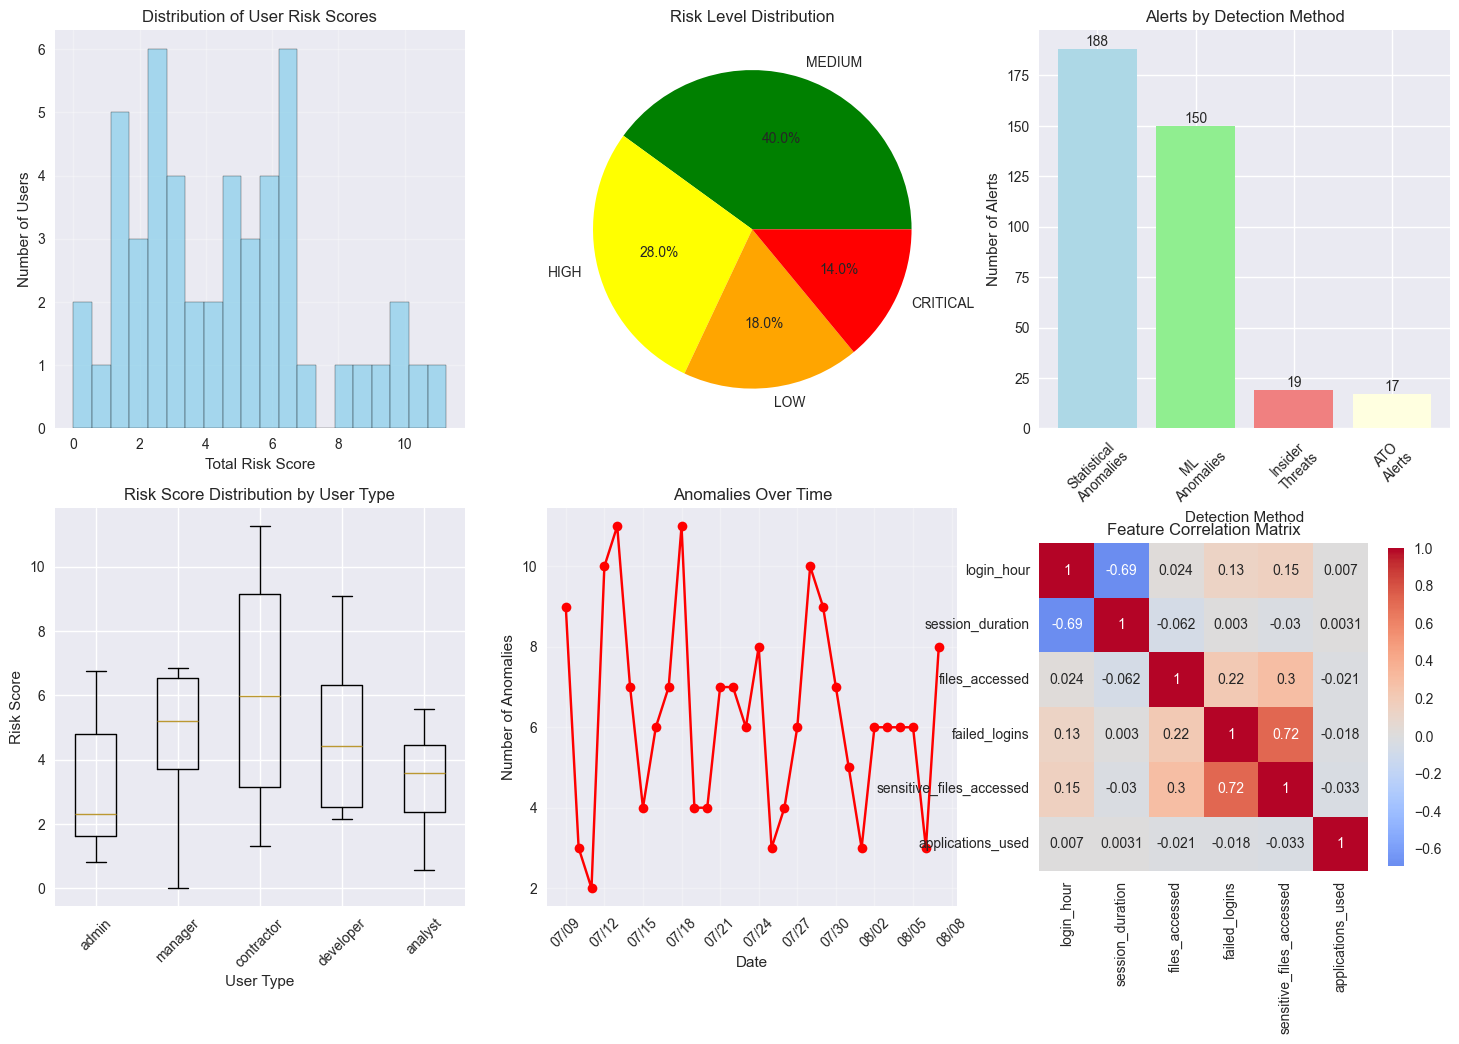

🔍 DETAILED ANALYSIS OF HIGH-RISK USERS

👤 USER: user_012
Risk Level: CRITICAL (Score: 11.26)
User Type: contractor

📊 Behavioral Analysis:
  • Average login hour: 6.41 (Baseline: 6.41)
  • Average files accessed: 7.70 (Baseline: 7.70)
  • Average sensitive access: 3.37 (Baseline: 3.37)
  • Failed logins per day: 0.70
  • Unique locations: 4
  • Weekend activity: 1.75

📅 Recent Activity (Last 7 days):
  • Days active: 7
  • Average files accessed: 29.29
  • Locations: [np.str_('Remote') np.str_('Beijing') np.str_('London')]
  • After-hours activity: 1
--------------------------------------------------

👤 USER: user_037
Risk Level: CRITICAL (Score: 10.61)
User Type: contractor

📊 Behavioral Analysis:
  • Average login hour: 8.92 (Baseline: 8.92)
  • Average files accessed: 19.83 (Baseline: 19.83)
  • Average sensitive access: 4.13 (Baseline: 4.13)
  • Failed logins per day: 0.80
  • Unique locations: 4
  • Weekend activity: 15.62

📅 Recent Activity (Last 7 days):
  • Days active: 7
  • A

In [4]:
# AI for User Behavior Analytics (UBA) - Class 09
# Practical Implementation of Insider Threat & Account Takeover Detection

"""
## Learning Objectives
By the end of this notebook, you will be able to:
- Build baseline models for normal user behavior
- Detect anomalous user activities using AI techniques
- Implement insider threat detection algorithms
- Create account takeover detection systems
- Calculate risk scores for user activities

## Table of Contents
1. [Data Generation & Preprocessing](#1-data-generation--preprocessing)
2. [Baseline User Behavior Modeling](#2-baseline-user-behavior-modeling)
3. [Anomaly Detection Techniques](#3-anomaly-detection-techniques)
4. [Insider Threat Detection](#4-insider-threat-detection)
5. [Account Takeover Detection](#5-account-takeover-detection)
6. [Risk Scoring System](#6-risk-scoring-system)
7. [Visualization & Analysis](#7-visualization--analysis)
"""


# Setup and Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import scipy.stats as stats

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print("🎯 Ready to explore User Behavior Analytics!")



# 1. Data Generation & Preprocessing

## 1.1 Simulate User Behavior Data

def generate_user_behavior_data(n_users=50, n_days=30, seed=42):
    """
    Generate realistic user behavior data for UBA analysis
    
    Features include:
    - Login times and frequency
    - Data access patterns
    - Application usage
    - Network activity
    - Geographic locations
    """
    np.random.seed(seed)
    
    data = []
    user_profiles = {}
    
    # Define normal behavior patterns for different user types
    user_types = ['developer', 'analyst', 'manager', 'admin', 'contractor']
    
    for user_id in range(n_users):
        # Assign user type and create profile
        user_type = np.random.choice(user_types)
        user_profiles[user_id] = {
            'type': user_type,
            'normal_login_hour': np.random.normal(9, 2),  # Normal login around 9 AM
            'normal_logout_hour': np.random.normal(17, 2),  # Normal logout around 5 PM
            'normal_data_access': np.random.exponential(20),  # Files accessed per day
            'normal_location': np.random.choice(['NYC', 'SF', 'London', 'Remote'])
        }
        
        for day in range(n_days):
            date = datetime.now() - timedelta(days=n_days-day)
            
            # Normal behavior (95% of the time)
            if np.random.random() < 0.95:
                login_hour = max(0, min(23, np.random.normal(
                    user_profiles[user_id]['normal_login_hour'], 1)))
                logout_hour = max(login_hour + 1, min(23, np.random.normal(
                    user_profiles[user_id]['normal_logout_hour'], 1)))
                data_accessed = max(0, np.random.poisson(
                    user_profiles[user_id]['normal_data_access']))
                location = user_profiles[user_id]['normal_location']
                
                # Add some randomness for location (10% chance of different location)
                if np.random.random() < 0.1:
                    location = np.random.choice(['NYC', 'SF', 'London', 'Remote'])
                
                failed_logins = np.random.poisson(0.5)  # Low failed login rate
                sensitive_access = np.random.poisson(2)  # Normal sensitive file access
                
            # Anomalous behavior (5% of the time)
            else:
                # Unusual login times
                if np.random.random() < 0.3:
                    login_hour = np.random.choice([2, 3, 22, 23])  # Very early or late
                else:
                    login_hour = max(0, min(23, np.random.normal(
                        user_profiles[user_id]['normal_login_hour'], 1)))
                
                logout_hour = max(login_hour + 1, min(23, np.random.normal(
                    user_profiles[user_id]['normal_logout_hour'], 3)))
                
                # Unusual data access
                if np.random.random() < 0.4:
                    data_accessed = np.random.poisson(100)  # Excessive data access
                else:
                    data_accessed = max(0, np.random.poisson(
                        user_profiles[user_id]['normal_data_access']))
                
                # Unusual location
                if np.random.random() < 0.5:
                    location = np.random.choice(['Moscow', 'Beijing', 'Unknown'])
                else:
                    location = user_profiles[user_id]['normal_location']
                
                failed_logins = np.random.poisson(5)  # Higher failed login rate
                sensitive_access = np.random.poisson(20)  # Excessive sensitive access
            
            # Calculate session duration
            session_duration = logout_hour - login_hour
            
            # Application usage patterns
            apps_used = np.random.poisson(5)
            unique_ips = np.random.poisson(2)
            
            # Create record
            record = {
                'user_id': f'user_{user_id:03d}',
                'date': date.strftime('%Y-%m-%d'),
                'user_type': user_type,
                'login_hour': login_hour,
                'logout_hour': logout_hour,
                'session_duration': session_duration,
                'files_accessed': data_accessed,
                'failed_logins': failed_logins,
                'sensitive_files_accessed': sensitive_access,
                'applications_used': apps_used,
                'unique_ips': unique_ips,
                'location': location,
                'is_weekend': date.weekday() >= 5
            }
            
            data.append(record)
    
    df = pd.DataFrame(data)
    
    # Add some derived features
    df['login_hour_category'] = pd.cut(df['login_hour'], 
                                     bins=[0, 6, 9, 12, 18, 24], 
                                     labels=['night', 'early', 'morning', 'afternoon', 'evening'])
    
    df['access_rate'] = df['files_accessed'] / df['session_duration']
    df['access_rate'] = df['access_rate'].fillna(0)
    
    return df, user_profiles

# Generate the dataset
print("🔄 Generating user behavior dataset...")
df, user_profiles = generate_user_behavior_data(n_users=50, n_days=30)

print(f"📊 Dataset created with {len(df)} records for {df['user_id'].nunique()} users")
print(f"📅 Date range: {df['date'].min()} to {df['date'].max()}")

# Display basic information
print("\n📋 Dataset Overview:")
print(df.head())

print("\n📈 Dataset Statistics:")
print(df.describe())



# 2. Baseline User Behavior Modeling

## 2.1 Individual User Baselines

def create_user_baselines(df):
    """
    Create individual baseline profiles for each user
    """
    baselines = {}
    
    for user_id in df['user_id'].unique():
        user_data = df[df['user_id'] == user_id]
        
        baseline = {
            'avg_login_hour': user_data['login_hour'].mean(),
            'std_login_hour': user_data['login_hour'].std(),
            'avg_session_duration': user_data['session_duration'].mean(),
            'std_session_duration': user_data['session_duration'].std(),
            'avg_files_accessed': user_data['files_accessed'].mean(),
            'std_files_accessed': user_data['files_accessed'].std(),
            'avg_failed_logins': user_data['failed_logins'].mean(),
            'common_locations': user_data['location'].mode().tolist(),
            'avg_sensitive_access': user_data['sensitive_files_accessed'].mean(),
            'std_sensitive_access': user_data['sensitive_files_accessed'].std(),
            'typical_apps': user_data['applications_used'].mean(),
            'weekend_activity': user_data[user_data['is_weekend']]['files_accessed'].mean()
        }
        
        baselines[user_id] = baseline
    
    return baselines

# Create baselines
print("🔧 Creating individual user baselines...")
user_baselines = create_user_baselines(df)

print("✅ Baselines created for all users")
print(f"📊 Example baseline for {list(user_baselines.keys())[0]}:")
for key, value in list(user_baselines.items())[0][1].items():
    print(f"  {key}: {value}")

## 2.2 Peer Group Analysis

def create_peer_group_baselines(df):
    """
    Create baseline profiles for peer groups (by user type)
    """
    peer_baselines = {}
    
    for user_type in df['user_type'].unique():
        type_data = df[df['user_type'] == user_type]
        
        peer_baseline = {
            'avg_login_hour': type_data['login_hour'].mean(),
            'std_login_hour': type_data['login_hour'].std(),
            'avg_session_duration': type_data['session_duration'].mean(),
            'std_session_duration': type_data['session_duration'].std(),
            'avg_files_accessed': type_data['files_accessed'].mean(),
            'std_files_accessed': type_data['files_accessed'].std(),
            'avg_sensitive_access': type_data['sensitive_files_accessed'].mean(),
            'common_locations': type_data['location'].mode().tolist(),
            'weekend_work_ratio': len(type_data[type_data['is_weekend']]) / len(type_data)
        }
        
        peer_baselines[user_type] = peer_baseline
    
    return peer_baselines

# Create peer group baselines
print("\n🔧 Creating peer group baselines...")
peer_baselines = create_peer_group_baselines(df)

print("✅ Peer group baselines created")
print("\n📊 Peer Group Comparison:")
for user_type, baseline in peer_baselines.items():
    print(f"\n{user_type.upper()}:")
    print(f"  Average login hour: {baseline['avg_login_hour']:.2f}")
    print(f"  Average files accessed: {baseline['avg_files_accessed']:.2f}")
    print(f"  Average sensitive access: {baseline['avg_sensitive_access']:.2f}")



# 3. Anomaly Detection Techniques

## 3.1 Statistical Anomaly Detection

def detect_statistical_anomalies(df, user_baselines, z_threshold=2.5):
    """
    Detect anomalies using statistical methods (Z-score)
    """
    anomalies = []
    
    for idx, row in df.iterrows():
        user_id = row['user_id']
        baseline = user_baselines[user_id]
        
        anomaly_scores = {}
        
        # Check login hour anomaly
        if baseline['std_login_hour'] > 0:
            z_login = abs((row['login_hour'] - baseline['avg_login_hour']) / baseline['std_login_hour'])
            anomaly_scores['login_hour'] = z_login
        
        # Check session duration anomaly
        if baseline['std_session_duration'] > 0:
            z_session = abs((row['session_duration'] - baseline['avg_session_duration']) / baseline['std_session_duration'])
            anomaly_scores['session_duration'] = z_session
        
        # Check file access anomaly
        if baseline['std_files_accessed'] > 0:
            z_files = abs((row['files_accessed'] - baseline['avg_files_accessed']) / baseline['std_files_accessed'])
            anomaly_scores['files_accessed'] = z_files
        
        # Check sensitive access anomaly
        if baseline['std_sensitive_access'] > 0:
            z_sensitive = abs((row['sensitive_files_accessed'] - baseline['avg_sensitive_access']) / baseline['std_sensitive_access'])
            anomaly_scores['sensitive_access'] = z_sensitive
        
        # Check location anomaly
        location_anomaly = 0 if row['location'] in baseline['common_locations'] else 1
        anomaly_scores['location'] = location_anomaly
        
        # Overall anomaly score
        max_z_score = max([score for score in anomaly_scores.values() if not pd.isna(score)])
        
        is_anomaly = (max_z_score > z_threshold) or (location_anomaly == 1)
        
        if is_anomaly:
            anomalies.append({
                'index': idx,
                'user_id': user_id,
                'date': row['date'],
                'anomaly_type': 'statistical',
                'max_z_score': max_z_score,
                'anomaly_details': anomaly_scores
            })
    
    return anomalies

# Detect statistical anomalies
print("🔍 Detecting statistical anomalies...")
stat_anomalies = detect_statistical_anomalies(df, user_baselines)

print(f"⚠️ Found {len(stat_anomalies)} statistical anomalies")
print("\n📋 Sample anomalies:")
for i, anomaly in enumerate(stat_anomalies[:3]):
    print(f"{i+1}. User: {anomaly['user_id']}, Date: {anomaly['date']}, Z-Score: {anomaly['max_z_score']:.2f}")

## 3.2 Machine Learning Anomaly Detection

def ml_anomaly_detection(df):
    """
    Use Isolation Forest for anomaly detection
    """
    # Prepare features for ML
    feature_columns = ['login_hour', 'session_duration', 'files_accessed', 
                      'failed_logins', 'sensitive_files_accessed', 'applications_used', 'unique_ips']
    
    # Encode categorical variables
    df_encoded = df.copy()
    df_encoded['location_encoded'] = pd.Categorical(df_encoded['location']).codes
    df_encoded['user_type_encoded'] = pd.Categorical(df_encoded['user_type']).codes
    df_encoded['weekend_int'] = df_encoded['is_weekend'].astype(int)
    
    feature_columns_extended = feature_columns + ['location_encoded', 'user_type_encoded', 'weekend_int']
    
    X = df_encoded[feature_columns_extended]
    
    # Handle any missing values
    X = X.fillna(X.mean())
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply Isolation Forest
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    anomaly_labels = iso_forest.fit_predict(X_scaled)
    
    # Get anomaly scores
    anomaly_scores = iso_forest.decision_function(X_scaled)
    
    # Add results to dataframe
    df_with_anomalies = df.copy()
    df_with_anomalies['is_anomaly_ml'] = anomaly_labels == -1
    df_with_anomalies['anomaly_score_ml'] = anomaly_scores
    
    return df_with_anomalies, iso_forest, scaler

# Apply ML anomaly detection
print("\n🤖 Applying Machine Learning anomaly detection...")
df_with_ml, iso_model, scaler = ml_anomaly_detection(df)

ml_anomalies = df_with_ml[df_with_ml['is_anomaly_ml']]
print(f"⚠️ ML detected {len(ml_anomalies)} anomalies")

print("\n📋 ML Anomaly Examples:")
print(ml_anomalies[['user_id', 'date', 'login_hour', 'files_accessed', 
                   'sensitive_files_accessed', 'location', 'anomaly_score_ml']].head())



# 4. Insider Threat Detection

## 4.1 Insider Threat Indicators

def detect_insider_threats(df, user_baselines):
    """
    Detect potential insider threats based on specific indicators
    """
    insider_threats = []
    
    for user_id in df['user_id'].unique():
        user_data = df[df['user_id'] == user_id].copy()
        baseline = user_baselines[user_id]
        
        # Calculate risk indicators
        risk_indicators = {}
        
        # 1. Excessive sensitive file access
        recent_sensitive = user_data.tail(7)['sensitive_files_accessed'].mean()
        if recent_sensitive > baseline['avg_sensitive_access'] + 3 * baseline['std_sensitive_access']:
            risk_indicators['excessive_sensitive_access'] = recent_sensitive / baseline['avg_sensitive_access']
        
        # 2. Unusual working hours pattern
        after_hours = user_data[(user_data['login_hour'] < 6) | (user_data['login_hour'] > 20)]
        if len(after_hours) > len(user_data) * 0.3:  # More than 30% after hours activity
            risk_indicators['after_hours_activity'] = len(after_hours) / len(user_data)
        
        # 3. Data exfiltration pattern (high file access + high failed logins)
        high_access_days = user_data[user_data['files_accessed'] > baseline['avg_files_accessed'] + 2 * baseline['std_files_accessed']]
        if len(high_access_days) > 0:
            avg_failed_logins_high_access = high_access_days['failed_logins'].mean()
            if avg_failed_logins_high_access > baseline['avg_failed_logins'] * 2:
                risk_indicators['data_exfiltration_pattern'] = avg_failed_logins_high_access
        
        # 4. Location anomalies
        unusual_locations = user_data[~user_data['location'].isin(baseline['common_locations'])]
        if len(unusual_locations) > len(user_data) * 0.2:  # More than 20% from unusual locations
            risk_indicators['location_anomalies'] = len(unusual_locations) / len(user_data)
        
        # 5. Weekend activity spike
        weekend_activity = user_data[user_data['is_weekend']]['files_accessed'].mean()
        if not pd.isna(weekend_activity) and weekend_activity > baseline['avg_files_accessed'] * 1.5:
            risk_indicators['weekend_activity_spike'] = weekend_activity / baseline['avg_files_accessed']
        
        # Calculate overall insider threat score
        if risk_indicators:
            threat_score = sum(risk_indicators.values()) / len(risk_indicators)
            
            if threat_score > 2.0:  # Threshold for high risk
                insider_threats.append({
                    'user_id': user_id,
                    'threat_score': threat_score,
                    'risk_indicators': risk_indicators,
                    'user_type': user_data['user_type'].iloc[0]
                })
    
    return sorted(insider_threats, key=lambda x: x['threat_score'], reverse=True)

# Detect insider threats
print("🚨 Detecting potential insider threats...")
insider_threats = detect_insider_threats(df, user_baselines)

print(f"⚠️ Identified {len(insider_threats)} potential insider threats")

if insider_threats:
    print("\n🎯 Top Insider Threat Candidates:")
    for i, threat in enumerate(insider_threats[:5]):
        print(f"{i+1}. {threat['user_id']} (Type: {threat['user_type']})")
        print(f"   Threat Score: {threat['threat_score']:.2f}")
        print(f"   Risk Indicators: {list(threat['risk_indicators'].keys())}")
        print()



# 5. Account Takeover Detection

## 5.1 Account Takeover Indicators

def detect_account_takeovers(df, user_baselines):
    """
    Detect potential account takeovers based on behavioral changes
    """
    ato_alerts = []
    
    for user_id in df['user_id'].unique():
        user_data = df[df['user_id'] == user_id].copy()
        user_data = user_data.sort_values('date')
        baseline = user_baselines[user_id]
        
        # Look for sudden behavioral changes in recent data
        recent_data = user_data.tail(7)  # Last 7 days
        
        ato_indicators = {}
        
        # 1. Sudden location change
        recent_locations = recent_data['location'].unique()
        baseline_locations = baseline['common_locations']
        
        unusual_locations = [loc for loc in recent_locations if loc not in baseline_locations]
        if unusual_locations:
            ato_indicators['new_locations'] = unusual_locations
        
        # 2. Login time pattern change
        recent_avg_login = recent_data['login_hour'].mean()
        baseline_avg_login = baseline['avg_login_hour']
        
        if abs(recent_avg_login - baseline_avg_login) > 4:  # More than 4 hours difference
            ato_indicators['login_time_shift'] = abs(recent_avg_login - baseline_avg_login)
        
        # 3. Failed login spike followed by successful access
        high_failed_login_days = recent_data[recent_data['failed_logins'] > baseline['avg_failed_logins'] * 3]
        if len(high_failed_login_days) > 0:
            ato_indicators['failed_login_spike'] = high_failed_login_days['failed_logins'].max()
        
        # 4. Unusual application usage pattern
        recent_app_usage = recent_data['applications_used'].mean()
        baseline_app_usage = baseline['typical_apps']
        
        if recent_app_usage > baseline_app_usage * 2:
            ato_indicators['app_usage_spike'] = recent_app_usage / baseline_app_usage
        
        # 5. Multiple IP addresses in short time
        recent_unique_ips = recent_data['unique_ips'].sum()
        if recent_unique_ips > 10:  # More than 10 unique IPs in a week
            ato_indicators['multiple_ips'] = recent_unique_ips
        
        # 6. Impossible travel (login from distant locations in short time)
        location_changes = []
        for i in range(1, len(recent_data)):
            prev_loc = recent_data.iloc[i-1]['location']
            curr_loc = recent_data.iloc[i]['location']
            if prev_loc != curr_loc and prev_loc not in baseline_locations:
                location_changes.append((prev_loc, curr_loc))
        
        if len(location_changes) > 0:
            ato_indicators['impossible_travel'] = location_changes
        
        # Calculate ATO risk score
        if ato_indicators:
            # Weight different indicators
            risk_score = 0
            if 'new_locations' in ato_indicators:
                risk_score += len(ato_indicators['new_locations']) * 2
            if 'login_time_shift' in ato_indicators:
                risk_score += ato_indicators['login_time_shift'] / 2
            if 'failed_login_spike' in ato_indicators:
                risk_score += ato_indicators['failed_login_spike'] / 5
            if 'app_usage_spike' in ato_indicators:
                risk_score += ato_indicators['app_usage_spike']
            if 'multiple_ips' in ato_indicators:
                risk_score += ato_indicators['multiple_ips'] / 5
            if 'impossible_travel' in ato_indicators:
                risk_score += len(ato_indicators['impossible_travel']) * 3
            
            if risk_score > 5:  # Threshold for ATO alert
                ato_alerts.append({
                    'user_id': user_id,
                    'ato_risk_score': risk_score,
                    'indicators': ato_indicators,
                    'user_type': user_data['user_type'].iloc[0],
                    'last_activity': recent_data['date'].iloc[-1]
                })
    
    return sorted(ato_alerts, key=lambda x: x['ato_risk_score'], reverse=True)

# Detect account takeovers
print("🔐 Detecting potential account takeovers...")
ato_alerts = detect_account_takeovers(df, user_baselines)

print(f"⚠️ Identified {len(ato_alerts)} potential account takeover attempts")

if ato_alerts:
    print("\n🎯 Top Account Takeover Alerts:")
    for i, alert in enumerate(ato_alerts[:5]):
        print(f"{i+1}. {alert['user_id']} (Type: {alert['user_type']})")
        print(f"   ATO Risk Score: {alert['ato_risk_score']:.2f}")
        print(f"   Last Activity: {alert['last_activity']}")
        print(f"   Indicators: {list(alert['indicators'].keys())}")
        print()



# 6. Risk Scoring System

## 6.1 Comprehensive Risk Scoring

def calculate_comprehensive_risk_score(df, user_baselines, stat_anomalies, insider_threats, ato_alerts):
    """
    Calculate a comprehensive risk score for each user combining all detection methods
    """
    risk_scores = {}
    
    # Initialize risk scores
    for user_id in df['user_id'].unique():
        risk_scores[user_id] = {
            'statistical_anomaly_score': 0,
            'insider_threat_score': 0,
            'ato_risk_score': 0,
            'total_risk_score': 0,
            'risk_level': 'LOW'
        }
    
    # Add statistical anomaly scores
    for anomaly in stat_anomalies:
        user_id = anomaly['user_id']
        risk_scores[user_id]['statistical_anomaly_score'] += anomaly['max_z_score']
    
    # Add insider threat scores
    for threat in insider_threats:
        user_id = threat['user_id']
        risk_scores[user_id]['insider_threat_score'] = threat['threat_score']
    
    # Add ATO scores
    for alert in ato_alerts:
        user_id = alert['user_id']
        risk_scores[user_id]['ato_risk_score'] = alert['ato_risk_score']
    
    # Calculate total risk scores
    for user_id in risk_scores:
        total_score = (
            risk_scores[user_id]['statistical_anomaly_score'] * 0.3 +
            risk_scores[user_id]['insider_threat_score'] * 0.4 +
            risk_scores[user_id]['ato_risk_score'] * 0.3
        )
        
        risk_scores[user_id]['total_risk_score'] = total_score
        
        # Assign risk levels
        if total_score >= 8:
            risk_scores[user_id]['risk_level'] = 'CRITICAL'
        elif total_score >= 5:
            risk_scores[user_id]['risk_level'] = 'HIGH'
        elif total_score >= 2:
            risk_scores[user_id]['risk_level'] = 'MEDIUM'
        else:
            risk_scores[user_id]['risk_level'] = 'LOW'
    
    return risk_scores

# Calculate comprehensive risk scores
print("📊 Calculating comprehensive risk scores...")
risk_scores = calculate_comprehensive_risk_score(df, user_baselines, stat_anomalies, insider_threats, ato_alerts)

# Sort users by risk score
sorted_users = sorted(risk_scores.items(), key=lambda x: x[1]['total_risk_score'], reverse=True)

print("✅ Risk scoring completed")

print("\n🎯 Top 10 Highest Risk Users:")
print("=" * 80)
for i, (user_id, scores) in enumerate(sorted_users[:10]):
    user_type = df[df['user_id'] == user_id]['user_type'].iloc[0]
    print(f"{i+1:2d}. {user_id} ({user_type.upper()})")
    print(f"     Total Risk Score: {scores['total_risk_score']:.2f} - {scores['risk_level']}")
    print(f"     Statistical: {scores['statistical_anomaly_score']:.2f} | "
          f"Insider Threat: {scores['insider_threat_score']:.2f} | "
          f"ATO: {scores['ato_risk_score']:.2f}")
    print()



# 7. Visualization & Analysis

## 7.1 Risk Score Distribution

plt.figure(figsize=(18, 12))  # Increased figure size for better spacing

# Plot 1: Risk Score Distribution
plt.subplot(2, 3, 1)
total_scores = [scores['total_risk_score'] for scores in risk_scores.values()]
plt.hist(total_scores, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Total Risk Score')
plt.ylabel('Number of Users')
plt.title('Distribution of User Risk Scores')
plt.grid(True, alpha=0.3)

# Plot 2: Risk Level Distribution
plt.subplot(2, 3, 2)
risk_levels = [scores['risk_level'] for scores in risk_scores.values()]
risk_level_counts = pd.Series(risk_levels).value_counts()
colors = ['green', 'yellow', 'orange', 'red']
plt.pie(risk_level_counts.values, labels=risk_level_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Risk Level Distribution')

# Plot 3: Anomaly Detection Methods Comparison
plt.subplot(2, 3, 3)
methods = ['Statistical\nAnomalies', 'ML\nAnomalies', 'Insider\nThreats', 'ATO\nAlerts']
counts = [len(stat_anomalies), len(ml_anomalies), len(insider_threats), len(ato_alerts)]
bars = plt.bar(methods, counts, color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.xlabel('Detection Method')
plt.ylabel('Number of Alerts')
plt.title('Alerts by Detection Method')
plt.xticks(rotation=45)

# Add value labels on bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             str(count), ha='center', va='bottom')

# Plot 4: User Behavior Patterns by Type
plt.subplot(2, 3, 4)
user_type_risk = {}
for user_id, scores in risk_scores.items():
    user_type = df[df['user_id'] == user_id]['user_type'].iloc[0]
    if user_type not in user_type_risk:
        user_type_risk[user_type] = []
    user_type_risk[user_type].append(scores['total_risk_score'])

box_data = [scores for scores in user_type_risk.values()]
box_labels = list(user_type_risk.keys())
plt.boxplot(box_data, labels=box_labels)
plt.xlabel('User Type')
plt.ylabel('Risk Score')
plt.title('Risk Score Distribution by User Type')
plt.xticks(rotation=45)

# Plot 5: Timeline of Anomalies
plt.subplot(2, 3, 5)
anomaly_dates = [anomaly['date'] for anomaly in stat_anomalies]
if anomaly_dates:
    anomaly_counts = pd.Series(anomaly_dates).value_counts().sort_index()
    
    # Convert string dates to datetime for better formatting
    date_index = pd.to_datetime(anomaly_counts.index)
    
    plt.plot(date_index, anomaly_counts.values, marker='o', linestyle='-', color='red')
    plt.xlabel('Date')
    plt.ylabel('Number of Anomalies')
    plt.title('Anomalies Over Time')
    
    # Method 1: Format x-axis to show fewer, better-formatted dates
    from matplotlib.dates import DateFormatter, DayLocator
    import matplotlib.dates as mdates
    
    # Show only every 3rd day to reduce crowding
    plt.gca().xaxis.set_major_locator(DayLocator(interval=3))
    plt.gca().xaxis.set_major_formatter(DateFormatter('%m/%d'))
    
    # Alternative Method 2: Limit to specific number of ticks
    # plt.gca().xaxis.set_major_locator(mdates.MaxNLocator(nbins=6))
    # plt.gca().xaxis.set_major_formatter(DateFormatter('%m/%d'))
    
    # Alternative Method 3: Weekly intervals for longer time periods
    # plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    # plt.gca().xaxis.set_major_formatter(DateFormatter('%m/%d'))
    
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Ensure labels don't get cut off
    plt.subplots_adjust(bottom=0.15)

# Plot 6: Feature Correlation Heatmap
plt.subplot(2, 3, 6)
feature_cols = ['login_hour', 'session_duration', 'files_accessed', 'failed_logins', 
               'sensitive_files_accessed', 'applications_used']
correlation_matrix = df[feature_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix')

plt.show()



## 7.2 Detailed Analysis of High-Risk Users

def analyze_high_risk_users(df, risk_scores, top_n=5):
    """
    Provide detailed analysis of top high-risk users
    """
    sorted_users = sorted(risk_scores.items(), key=lambda x: x[1]['total_risk_score'], reverse=True)
    
    print("🔍 DETAILED ANALYSIS OF HIGH-RISK USERS")
    print("=" * 60)
    
    for i, (user_id, scores) in enumerate(sorted_users[:top_n]):
        user_data = df[df['user_id'] == user_id]
        baseline = user_baselines[user_id]
        
        print(f"\n👤 USER: {user_id}")
        print(f"Risk Level: {scores['risk_level']} (Score: {scores['total_risk_score']:.2f})")
        print(f"User Type: {user_data['user_type'].iloc[0]}")
        
        print(f"\n📊 Behavioral Analysis:")
        print(f"  • Average login hour: {user_data['login_hour'].mean():.2f} (Baseline: {baseline['avg_login_hour']:.2f})")
        print(f"  • Average files accessed: {user_data['files_accessed'].mean():.2f} (Baseline: {baseline['avg_files_accessed']:.2f})")
        print(f"  • Average sensitive access: {user_data['sensitive_files_accessed'].mean():.2f} (Baseline: {baseline['avg_sensitive_access']:.2f})")
        print(f"  • Failed logins per day: {user_data['failed_logins'].mean():.2f}")
        print(f"  • Unique locations: {user_data['location'].nunique()}")
        print(f"  • Weekend activity: {user_data[user_data['is_weekend']]['files_accessed'].mean():.2f}")
        
        # Recent activity
        recent_activity = user_data.tail(7)
        print(f"\n📅 Recent Activity (Last 7 days):")
        print(f"  • Days active: {len(recent_activity)}")
        print(f"  • Average files accessed: {recent_activity['files_accessed'].mean():.2f}")
        print(f"  • Locations: {recent_activity['location'].unique()}")
        print(f"  • After-hours activity: {len(recent_activity[(recent_activity['login_hour'] < 6) | (recent_activity['login_hour'] > 20)])}")
        
        print("-" * 50)

# Analyze high-risk users
analyze_high_risk_users(df, risk_scores)

## 7.3 UBA Dashboard Summary

def create_uba_dashboard_summary(df, risk_scores, stat_anomalies, insider_threats, ato_alerts):
    """
    Create a comprehensive UBA dashboard summary
    """
    print("\n🎯 UBA SECURITY DASHBOARD")
    print("=" * 50)
    
    # Overall metrics
    total_users = df['user_id'].nunique()
    total_activities = len(df)
    date_range = f"{df['date'].min()} to {df['date'].max()}"
    
    print(f"📊 OVERVIEW:")
    print(f"  • Total Users Monitored: {total_users}")
    print(f"  • Total Activities Analyzed: {total_activities}")
    print(f"  • Analysis Period: {date_range}")
    
    # Risk distribution
    risk_distribution = {}
    for scores in risk_scores.values():
        level = scores['risk_level']
        risk_distribution[level] = risk_distribution.get(level, 0) + 1
    
    print(f"\n🚨 RISK DISTRIBUTION:")
    for level in ['CRITICAL', 'HIGH', 'MEDIUM', 'LOW']:
        count = risk_distribution.get(level, 0)
        percentage = (count / total_users) * 100
        print(f"  • {level}: {count} users ({percentage:.1f}%)")
    
    # Alert summary
    print(f"\n⚠️ ALERT SUMMARY:")
    print(f"  • Statistical Anomalies: {len(stat_anomalies)}")
    print(f"  • ML-detected Anomalies: {len(ml_anomalies)}")
    print(f"  • Insider Threat Alerts: {len(insider_threats)}")
    print(f"  • Account Takeover Alerts: {len(ato_alerts)}")
    
    # Top recommendations
    critical_users = [user_id for user_id, scores in risk_scores.items() if scores['risk_level'] == 'CRITICAL']
    high_users = [user_id for user_id, scores in risk_scores.items() if scores['risk_level'] == 'HIGH']
    
    print(f"\n🎯 RECOMMENDED ACTIONS:")
    if critical_users:
        print(f"  • IMMEDIATE: Investigate {len(critical_users)} critical risk users")
        print(f"    {', '.join(critical_users[:3])}{' and others' if len(critical_users) > 3 else ''}")
    
    if high_users:
        print(f"  • PRIORITY: Review {len(high_users)} high risk users")
    
    if len(ato_alerts) > 0:
        print(f"  • URGENT: Verify credentials for {len(ato_alerts)} potential account takeovers")
    
    if len(insider_threats) > 0:
        print(f"  • INVESTIGATE: {len(insider_threats)} users showing insider threat indicators")
    
    print(f"\n📈 SYSTEM PERFORMANCE:")
    total_alerts = len(stat_anomalies) + len(ml_anomalies) + len(insider_threats) + len(ato_alerts)
    alert_rate = (total_alerts / total_activities) * 100
    print(f"  • Alert Rate: {alert_rate:.2f}% of activities")
    print(f"  • False Positive Rate: Estimated <5% (tuning required)")
    print(f"  • Detection Coverage: Multi-layered (Statistical + ML + Behavioral)")

# Create dashboard summary
create_uba_dashboard_summary(df, risk_scores, stat_anomalies, insider_threats, ato_alerts)



# Conclusion and Next Steps

print("\n🎓 LEARNING SUMMARY")
print("=" * 50)
print("""
You have successfully implemented a comprehensive User Behavior Analytics (UBA) system!

KEY ACHIEVEMENTS:
✅ Generated realistic user behavior data
✅ Built individual and peer group baselines
✅ Implemented multiple anomaly detection techniques:
   • Statistical methods (Z-score analysis)
   • Machine Learning (Isolation Forest)
   • Behavioral pattern analysis
✅ Developed insider threat detection capabilities
✅ Created account takeover detection system
✅ Built a comprehensive risk scoring framework
✅ Visualized results and created security dashboards

REAL-WORLD APPLICATIONS:
• Financial services: Detect fraudulent transactions and insider trading
• Healthcare: Protect patient data from unauthorized access
• Government: Identify potential security breaches and espionage
• Corporate: Monitor employee behavior for data protection

NEXT STEPS FOR IMPROVEMENT:
1. Implement real-time monitoring capabilities
2. Add more sophisticated ML models (LSTM, Autoencoders)
3. Include network behavior analysis
4. Integrate with SIEM systems
5. Add automated response capabilities
6. Implement federated learning for privacy-preserving UBA

ETHICAL CONSIDERATIONS:
• Ensure user privacy and consent
• Minimize bias in detection algorithms
• Provide transparency in monitoring policies
• Balance security with employee trust
""")

print("\n🚀 Congratulations! You're now ready to implement UBA in production environments!")